# Визуализация бетстреппинга - 1d выборка

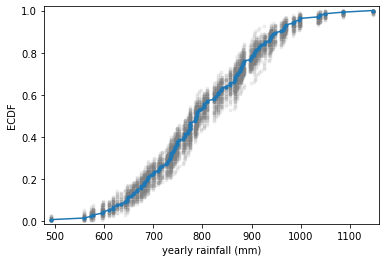

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n  #шкала от 0 до 1
    return x, y

rainfall = np.array([   875.5,   648.2,   788.1,   940.3,   491.1,   743.5,   730.1,
                        686.5,   878.8,   865.6,   654.9,   831.5,   798.1,   681.8,
                        743.8,   689.1,   752.1,   837.2,   710.6,   749.2,   967.1,
                        701.2,   619. ,   747.6,   803.4,   645.6,   804.1,   787.4,
                        646.8,   997.1,   774. ,   734.5,   835. ,   840.7,   659.6,
                        828.3,   909.7,   856.9,   578.3,   904.2,   883.9,   740.1,
                        773.9,   741.4,   866.8,   871.1,   712.5,   919.2,   927.9,
                        809.4,   633.8,   626.8,   871.3,   774.3,   898.8,   789.6,
                        936.3,   765.4,   882.1,   681.1,   661.3,   847.9,   683.9,
                        985.7,   771.1,   736.6,   713.2,   774.5,   937.7,   694.5,
                        598.2,   983.8,   700.2,   901.3,   733.5,   964.4,   609.3,
                        1035.2,   718. ,   688.6,   736.8,   643.3,  1038.5,   969. ,
                        802.7,   876.6,   944.7,   786.6,   770.4,   808.6,   761.3,
                        774.2,   559.3,   674.2,   883.6,   823.9,   960.4,   877.8,
                        940.6,   831.8,   906.2,   866.5,   674.1,   998.1,   789.3,
                        915. ,   737.1,   763. ,   666.7,   824.5,   913.8,   905.1,
                        667.8,   747.4,   784.7,   925.4,   880.2,  1086.9,   764.4,
                        1050.1,   595.2,   855.2,   726.9,   785.2,   948.8,   970.6,
                        896. ,   618.4,   572.4,  1146.4,   728.2,   864.2,   793. ])
#сам бутстреп
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))
    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

In [9]:
#объявим функцию для бутстреппинга
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [12]:
#This func generates many bootstrap replicates from the data set. 
#This function will come in handy for you again and again as you compute confidence intervals 
#and later when you do hypothesis tests
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

10.510549150506188
10.606610593776328


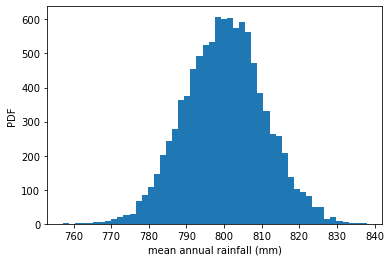

In [22]:
#возьмем 10 000 бутстрепов и визуализиреум среднее
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print SEM - standard error of the mean
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [15]:
#по нашему бутстрепу посчитаем довер интервалы - диапазон, куда попадают 95% наблюдений
#Using your bootstrap replicates you just generated to compute the 95% confidence interval. 
#That is, give the 2.5th and 97.5th percentile of your bootstrap replicates stored as bs_replicates
np.percentile(bs_replicates, [2.5, 97.5])

array([779.65409774, 821.25601504])

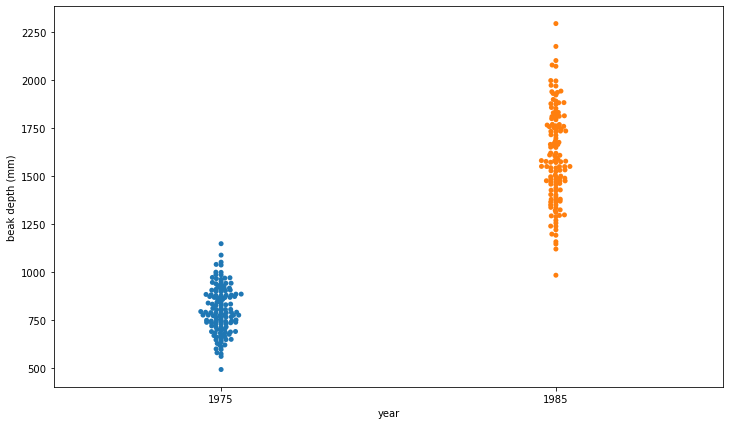

In [49]:
#визуализация 1 показателя в разные годы

#dummy data
rainfall_2=rainfall*2
data=np.concatenate((rainfall,rainfall_2), axis=0)
l=[1975]*133
l2=[1985]*133
l=l+l2
df=pd.DataFrame({'year': l, 'beak_depth': data})

plt.figure(figsize=(12,7))
# Create bee swarm plot
_ = sns.swarmplot(data=df, x='year', y='beak_depth')

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()